In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
planes=pd.read_csv(r"D:\python Folder\planes.csv")
planes

In [3]:
airline_prices_median= planes.groupby("Airline")["Price"].median()
print(airline_prices_median)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5135.0
IndiGo                5013.0
Jet Airways          11467.0
Multiple carriers     9871.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [4]:
airline_prices_mean= planes.groupby("Airline")["Price"].mean()
print(airline_prices_mean)

Airline
Air Asia              5629.657627
Air India             9593.015605
GoAir                 5914.477273
IndiGo                5684.994638
Jet Airways          11605.228850
Multiple carriers    10867.189189
SpiceJet              4290.035952
Vistara               7831.260970
Name: Price, dtype: float64


In [5]:
airline_prices_max= planes.groupby("Airline")["Price"].max()
print(airline_prices_max)

Airline
Air Asia             13474.0
Air India            31945.0
GoAir                22794.0
IndiGo               19685.0
Jet Airways          54826.0
Multiple carriers    36983.0
SpiceJet             23267.0
Vistara              21730.0
Name: Price, dtype: float64


In [6]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())
 

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  126
Number of unique values in Dep_Time column:  221
Number of unique values in Arrival_Time column:  1334
Number of unique values in Duration column:  367
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  10


In [7]:
# Preview the column
print(planes["Duration"].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


In [8]:
# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "")
print(planes["Duration"].head())

0        19
1     5 25m
2     4 45m
3     2 25m
4    15 30m
Name: Duration, dtype: object


In [9]:
planes["Duration"] = planes["Duration"].str.replace("m", "")
print(planes["Duration"].head())

0       19
1     5 25
2     4 45
3     2 25
4    15 30
Name: Duration, dtype: object


In [10]:
# Split the string into two parts (hour and minute)
planes[['Hour', 'Minute']] = planes['Duration'].astype(str).str.split(' ', expand=True)

# Fill missing minutes with 0
planes['Minute'] = planes['Minute'].fillna(0)

# Convert to float
planes['Hour'] = planes['Hour'].astype(float)
planes['Minute'] = planes['Minute'].astype(float)

# Calculate the total hours
planes['Duration_Hours'] = planes['Hour'] + (planes['Minute'] / 60)

# Check
print(planes[['Duration', 'Duration_Hours']])


      Duration  Duration_Hours
0           19       19.000000
1         5 25        5.416667
2         4 45        4.750000
3         2 25        2.416667
4        15 30       15.500000
...        ...             ...
10655     2 30        2.500000
10656     2 35        2.583333
10657        3        3.000000
10658     2 40        2.666667
10659     8 20        8.333333

[10660 rows x 2 columns]


In [11]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())
print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4230.748840             3685
IndiGo             2266.753552             1981
Air India          3865.871975             1686
Multiple carriers  3763.674706             1148
SpiceJet           1790.851944              787
Vistara            2864.267802              455
Air Asia           2016.738954              309
GoAir              2790.815129              182
Name: count, dtype: int64


In [12]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration_Hours"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.333333                  3685
IndiGo             2.916667                   1981
Air India          15.916667                  1686
Multiple carriers  10.250000                  1148
SpiceJet           2.500000                    787
Vistara            3.166667                    455
Air Asia           2.833333                    309
GoAir              5.166667                    182
Name: count, dtype: int64


In [13]:
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())


Destination  price_destination_mean
Cochin       10506.993486              4391
Banglore     9132.225153               2773
Delhi        5157.794118               1219
New Delhi    11738.589499               888
Hyderabad    5025.210280                673
Kolkata      4801.489796                369
Name: count, dtype: int64


In [43]:
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Hour,Minute,Duration_Hours,airline_price_st_dev,airline_median_duration,price_destination_mean
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2,No info,13882.0,19.0,0.0,19.000000,4230.748840,13.333333,10506.993486
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5 25,1,No info,6218.0,5.0,25.0,5.416667,2266.753552,2.916667,9132.225153
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4 45,1,No info,13302.0,4.0,45.0,4.750000,2266.753552,2.916667,11738.589499
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2 25,non-,No info,3873.0,2.0,25.0,2.416667,1790.851944,2.500000,9132.225153
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15 30,1,In-flight meal not included,11087.0,15.0,30.0,15.500000,4230.748840,13.333333,11738.589499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2 30,non-,No info,4107.0,2.0,30.0,2.500000,2016.738954,2.833333,9132.225153
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2 35,non-,No info,4145.0,2.0,35.0,2.583333,3865.871975,15.916667,9132.225153
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3,non-,NaN,7229.0,3.0,0.0,3.000000,4230.748840,13.333333,5157.794118
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2 40,non-,No info,12648.0,2.0,40.0,2.666667,2864.267802,3.166667,11738.589499


In [44]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

NameError: name 'sns' is not defined

In [45]:
# Display descriptive statistics for flight duration
print(planes["Duration"].describe())

count     9764
unique     364
top       2 50
freq       500
Name: Duration, dtype: object


In [46]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)


In [47]:
print(price_seventy_fifth)

12284.0


In [48]:
print(price_twenty_fifth)

5228.0


In [49]:
# Calculate iqr
prices_iqr = price_seventy_fifth -  price_twenty_fifth 
print(prices_iqr)

7056.0


In [50]:
# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)
print( upper, lower)

22868.0 -5356.0


In [51]:
# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]
print(planes["Price"].describe())

count     9957.000000
mean      8872.328613
std       4052.683927
min       1759.000000
25%       5228.000000
50%       8277.000000
75%      12284.000000
max      22798.000000
Name: Price, dtype: float64


In [52]:
pd.crosstab(planes["Source"], planes["Destination"])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1139,0,0,759
Chennai,0,0,0,0,340,0
Delhi,0,4068,0,0,0,0
Kolkata,2571,0,0,0,0,0
Mumbai,0,0,0,629,0,0


In [53]:
pd.crosstab(planes["Source"], planes["Destination"], values=planes["Price"], aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10008.0
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3210.0,NaN,NaN


In [54]:
print(planes["Total_Stops"].value_counts())

Total_Stops
1       5140
non-    3238
2       1394
3         40
4          1
Name: count, dtype: int64


In [58]:
planes["Total_Stops"] = planes["Total_Stops"].replace("non-", "0")
print(planes["Total_Stops"].value_counts())

Total_Stops
1    5140
0    3238
2    1394
3      40
4       1
Name: count, dtype: int64


C:\Users\melih\AppData\Local\Temp\ipykernel_16372\915120599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes["Total_Stops"] = planes["Total_Stops"].replace("non-", "0")


In [64]:
# Inspect unique values to understand what you're working with
print(planes["Total_Stops"].unique())


[nan]


<Axes: >

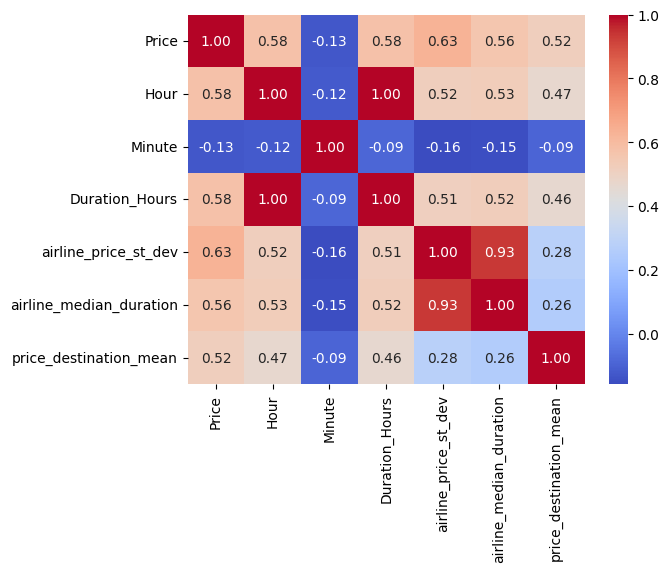

In [71]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = planes.corr(numeric_only=True)

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

In [79]:
#Textracting Month and Weekday from Date
# Convert to datetime format
planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"], errors='coerce')
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday
planes

C:\Users\melih\AppData\Local\Temp\ipykernel_16372\54953710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"], errors='coerce')
C:\Users\melih\AppData\Local\Temp\ipykernel_16372\54953710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes["month"] = planes["Date_of_Journey"].dt.month
C:\Users\melih\AppData\Local\Temp\ipykernel_16372\54953710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Hour,Minute,Duration_Hours,airline_price_st_dev,airline_median_duration,price_destination_mean,Total_stops,month,weekday
0,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,NaN,No info,13882.0,19.0,0.0,19.000000,4230.748840,13.333333,10506.993486,2,9.0,4.0
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5 25,NaN,No info,6218.0,5.0,25.0,5.416667,2266.753552,2.916667,9132.225153,1,12.0,3.0
2,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4 45,NaN,No info,13302.0,4.0,45.0,4.750000,2266.753552,2.916667,11738.589499,1,1.0,3.0
3,SpiceJet,NaT,Kolkata,Banglore,CCU → BLR,09:00,11:25,2 25,NaN,No info,3873.0,2.0,25.0,2.416667,1790.851944,2.500000,9132.225153,non-,NaN,NaN
4,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15 30,NaN,In-flight meal not included,11087.0,15.0,30.0,15.500000,4230.748840,13.333333,11738.589499,1,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2 30,NaN,No info,4107.0,2.0,30.0,2.500000,2016.738954,2.833333,9132.225153,non-,9.0,2.0
10656,Air India,NaT,Kolkata,Banglore,CCU → BLR,20:45,23:20,2 35,NaN,No info,4145.0,2.0,35.0,2.583333,3865.871975,15.916667,9132.225153,non-,NaN,NaN
10657,Jet Airways,NaT,Banglore,Delhi,BLR → DEL,NaN,11:20,3,NaN,NaN,7229.0,3.0,0.0,3.000000,4230.748840,13.333333,5157.794118,non-,NaN,NaN
10658,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2 40,NaN,No info,12648.0,2.0,40.0,2.666667,2864.267802,3.166667,11738.589499,non-,1.0,3.0


In [83]:
planes.loc[:, "Total_Stops"] = planes["Total_Stops"].replace("non-", "0")


In [84]:
print(planes["Total_Stops"].value_counts())

Series([], Name: count, dtype: int64)


In [85]:
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Hour,Minute,Duration_Hours,airline_price_st_dev,airline_median_duration,price_destination_mean,Total_stops,month,weekday
0,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,NaN,No info,13882.0,19.0,0.0,19.000000,4230.748840,13.333333,10506.993486,2,9.0,4.0
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5 25,NaN,No info,6218.0,5.0,25.0,5.416667,2266.753552,2.916667,9132.225153,1,12.0,3.0
2,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4 45,NaN,No info,13302.0,4.0,45.0,4.750000,2266.753552,2.916667,11738.589499,1,1.0,3.0
3,SpiceJet,NaT,Kolkata,Banglore,CCU → BLR,09:00,11:25,2 25,NaN,No info,3873.0,2.0,25.0,2.416667,1790.851944,2.500000,9132.225153,non-,NaN,NaN
4,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15 30,NaN,In-flight meal not included,11087.0,15.0,30.0,15.500000,4230.748840,13.333333,11738.589499,1,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2 30,NaN,No info,4107.0,2.0,30.0,2.500000,2016.738954,2.833333,9132.225153,non-,9.0,2.0
10656,Air India,NaT,Kolkata,Banglore,CCU → BLR,20:45,23:20,2 35,NaN,No info,4145.0,2.0,35.0,2.583333,3865.871975,15.916667,9132.225153,non-,NaN,NaN
10657,Jet Airways,NaT,Banglore,Delhi,BLR → DEL,NaN,11:20,3,NaN,NaN,7229.0,3.0,0.0,3.000000,4230.748840,13.333333,5157.794118,non-,NaN,NaN
10658,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2 40,NaN,No info,12648.0,2.0,40.0,2.666667,2864.267802,3.166667,11738.589499,non-,1.0,3.0


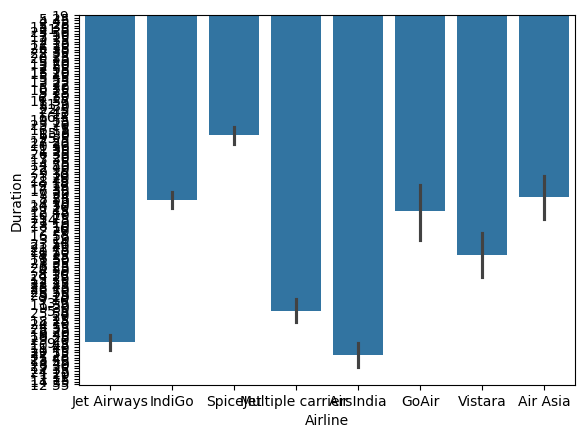

In [86]:
sns.barplot(data=planes, x="Airline", y="Duration")
plt.show()
